In [1]:
# Import statements
import pandas as pd
import textblob
from textblob import Word, TextBlob
import nltk
from nltk.corpus import stopwords
import re # regular expression
import os
from wordcloud import WordCloud # to represnet words in image format
import matplotlib.pyplot as plt
from collections import Counter  # frequency calculations
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer # noramlization of a data like a min max scalar

In [2]:
os.getcwd()

'C:\\Users\\harid\\OneDrive\\Desktop\\ksr practice session\\project on sentiental analsis'

In [3]:
# Import Excel data
OriginalData = pd.read_excel("Glassdoor reviews.xlsx", header = 0, na_values = ['NaN'])

In [4]:
OriginalData.head(2)

,Pros,Cons
0,"A very good company, working environment is ve...",Paywise iit is very less
1,Good working environment in Bangalore,compensation is not that great


In [5]:
OriginalData.shape

(1365, 2)

In [6]:
OriginalData.loc[OriginalData["Pros"].isnull() & OriginalData["Cons"].isnull()]

,Pros,Cons
731,NaN,NaN


In [7]:
OriginalData1=OriginalData.drop([731],axis=0)

In [8]:
OriginalData1.shape

(1364, 2)

In [9]:
# Drop the rows with all nulls

OriginalData = OriginalData.drop(OriginalData[(OriginalData.Cons.isnull() & OriginalData.Pros.isnull())].index)

In [10]:
OriginalData.shape

(1364, 2)

In [11]:
OriginalData.loc[OriginalData["Pros"].isnull() & OriginalData["Cons"].isnull()]

,Pros,Cons


In [12]:
OriginalData.loc[OriginalData["Cons"].isnull()]

,Pros,Cons
169,- Good work life balance\n\n- Open door polic...,NaN
408,-Onsite opportunities are good if you are in E...,NaN
552,-Highly caring about peoples and cultures\n\n-...,NaN
653,- Good Work Environment\n\n- Work Life Balance...,NaN
671,- Good work environment\n\n- Good policies\n\n...,NaN
787,"- If you are in right team, you get to work on...",NaN
807,- Flexible work culture\n\n- Plenty of opportu...,NaN
1187,-- You will get a lot of exposure to work on t...,NaN


In [13]:
# Replace null columns in cons column to "No Cons"
OriginalData.loc[(OriginalData.Cons.isnull())] = "No Cons"

In [14]:
OriginalData.loc[OriginalData["Cons"].isnull()]

,Pros,Cons


In [15]:
OriginalData.loc[OriginalData["Pros"].isnull()]

,Pros,Cons


In [16]:
# Divide the data into pros and cons
prosdf = pd.DataFrame(OriginalData["Pros"])
consdf = pd.DataFrame(OriginalData["Cons"])

In [17]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\n\nWork life balance .
4,"Equality among the colleagues ,Stress free env..."


In [18]:
consdf.head()

,Cons
0,Paywise iit is very less
1,compensation is not that great
2,they do not have good opportunities any more i...
3,Very less hike now a days .\n\nAnnual variable...
4,I would say I don't find any cons in accent


In [19]:
# Write some functions

# Function to clean data
def clean_review(text):
    '''
    This fucntion is to clean the data
    '''
    letters_only = re.sub("[^a-zA-Z]"," ", text) # Remove all digits and punctuation
    words = letters_only.lower().split() # Convert it into lower case and then stroing in word format
    clean_words = [w for w in words if len(w) > 2] # Remove 1/2 letter words
    return(" ".join(clean_words))

# Function to identify stop words
def stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to plot word cloud
def plot_word_cloud(text):
    wordcloud = WordCloud().generate(text) # Plot wordcloud using WordCloud function
    
    #%matplotlib inline # plot the graph in the same window
    
    fig = plt.figure(figsize = (10,12)) # set the figure margins
    plot = plt.imshow(wordcloud) # show the plot
    return plot

# Function to return stopwords
def stopwordcount(plist):
    return sum(plist, [])


In [20]:
clean_review("Compensation123,. is 999 ???$not that great!!!\r\r")

'compensation not that great'

In [21]:
stop_words("Compensation is not or  or that great")

['is', 'that', 'not', 'or']

In [22]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\n\nWork life balance .
4,"Equality among the colleagues ,Stress free env..."


In [23]:
prosdf.tail()

,Pros
1360,Learn sql and some business tactic . But bette...
1361,Great pace to work. Should invest more on hr p...
1362,Good working environment\n\nGood Opportunities...
1363,More freedom on your work. Individual efforts ...
1364,No Peer Pressure\n\nHighly Professional Enviro...


In [24]:
consdf.head()

,Cons
0,Paywise iit is very less
1,compensation is not that great
2,they do not have good opportunities any more i...
3,Very less hike now a days .\n\nAnnual variable...
4,I would say I don't find any cons in accent


In [25]:
consdf.tail()

,Cons
1360,Only above thing. Nothing else you can have he...
1361,None that I can think of
1362,1. Salary hikes are not good\n\n2. No Work lif...
1363,Too individualistic. Individual efforts are co...
1364,Less Pay Hikes\n\nLess learning and growth


In [26]:
# Identify stop words in the prosdf data
prosdf['PreCleanStopWords'] = prosdf['Pros'].apply(lambda x: stop_words(x))

In [27]:
prosdf.head()

,Pros,PreCleanStopWords
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]"
1,Good working environment in Bangalore,[in]
2,it has good work environment,"[it, has]"
3,Company is good to work .\n\nWork life balance .,"[is, to]"
4,"Equality among the colleagues ,Stress free env...",[the]


In [28]:
# Clean the prosdf data
prosdf['CleanedReview'] = prosdf['Pros'].apply(lambda x: clean_review(x))

In [29]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...
1,Good working environment in Bangalore,[in],good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...


In [30]:
prosdf.tail()

,Pros,PreCleanStopWords,CleanedReview
1360,Learn sql and some business tactic . But bette...,"[to, but, and, some]",learn sql and some business tactic but better ...
1361,Great pace to work. Should invest more on hr p...,"[more, to, should, on]",great pace work should invest more policies wo...
1362,Good working environment\n\nGood Opportunities...,[for],good working environment good opportunities fo...
1363,More freedom on your work. Individual efforts ...,"[are, more, on, your]",more freedom your work individual efforts are ...
1364,No Peer Pressure\n\nHighly Professional Enviro...,"[no, for]",peer pressure highly professional environment ...


In [31]:
# Identify stop words in cleaned data
prosdf['PostCleanStopWords'] = prosdf['CleanedReview'].apply(lambda x: stop_words(x))

In [32]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]"
1,Good working environment in Bangalore,[in],good working environment bangalore,[]
2,it has good work environment,"[it, has]",has good work environment,[has]
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[]
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the]


In [33]:
prosdf.tail()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords
1360,Learn sql and some business tactic . But bette...,"[to, but, and, some]",learn sql and some business tactic but better ...,"[but, and, some]"
1361,Great pace to work. Should invest more on hr p...,"[more, to, should, on]",great pace work should invest more policies wo...,"[more, should]"
1362,Good working environment\n\nGood Opportunities...,[for],good working environment good opportunities fo...,[for]
1363,More freedom on your work. Individual efforts ...,"[are, more, on, your]",more freedom your work individual efforts are ...,"[are, more, your]"
1364,No Peer Pressure\n\nHighly Professional Enviro...,"[no, for]",peer pressure highly professional environment ...,[for]


In [34]:
# Clean the data, identify stop words in original data and clean data in consdf
consdf['PreCleanStopWords'] = consdf['Cons'].apply(lambda x: stop_words(x))
consdf['CleanedReview'] = consdf['Cons'].apply(lambda x: clean_review(x))
consdf['PostCleanStopWords'] = consdf['CleanedReview'].apply(lambda x: stop_words(x))

In [35]:
# Extract stop words from prosdf data
stopWords = stopwordcount(prosdf['PostCleanStopWords'])
stopWords[0:10]

['very', 'other', 'and', 'has', 'the', 'this', 'will', 'you', 'and', 'you']

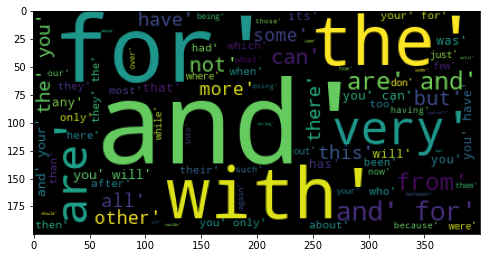

In [36]:
wordcloud = WordCloud().generate(str(stopWords)) # Plot wordcloud using WordCloud function
    
#%matplotlib inline # plot the graph in the same window
    
fig = plt.figure(figsize = (8,6)) # set the figure margins
plot = plt.imshow(wordcloud) # show the plot

In [37]:
Counter(stopWords)

Counter({'very': 106,
         'other': 37,
         'and': 399,
         'has': 31,
         'the': 193,
         'this': 42,
         'will': 64,
         'you': 177,
         'are': 175,
         'more': 39,
         'been': 13,
         'yourself': 3,
         'with': 139,
         'not': 51,
         'for': 261,
         'from': 73,
         'have': 73,
         'can': 85,
         'their': 16,
         'only': 34,
         'here': 24,
         'then': 12,
         'your': 62,
         'who': 21,
         'above': 3,
         'but': 49,
         'they': 37,
         'there': 42,
         'its': 31,
         'was': 30,
         'after': 12,
         'than': 21,
         'all': 46,
         'over': 6,
         'don': 10,
         'too': 14,
         'being': 6,
         'while': 9,
         'had': 16,
         'having': 7,
         'during': 3,
         'any': 27,
         'once': 1,
         'themselves': 1,
         'doing': 5,
         'our': 7,
         'that': 31,
         'bec

In [38]:
# Function to identify  no stop words
def no_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to identify  no stop words
def clean_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(" ".join(stop_words))


In [39]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]"
1,Good working environment in Bangalore,[in],good working environment bangalore,[]
2,it has good work environment,"[it, has]",has good work environment,[has]
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[]
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the]


In [40]:
# Remove stop words
prosdf['stop_removed'] = prosdf['CleanedReview'].apply(lambda x: no_stop_words(x))
consdf['stop_removed'] = consdf['CleanedReview'].apply(lambda x: no_stop_words(x))

In [41]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]","[work, friendly, environment, good, company, w..."
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[bangalore, environment, good, working]"
2,it has good work environment,"[it, has]",has good work environment,[has],"[work, environment, good]"
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[],"[work, good, company, life, balance]"
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[free, environment, colleagues, equality, stre..."


In [42]:
# Remove stop words and clean text
prosdf['clean_text'] = prosdf['CleanedReview'].apply(lambda x: clean_stop_words(x))
consdf['clean_text'] = consdf['CleanedReview'].apply(lambda x: clean_stop_words(x))


In [43]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]","[work, friendly, environment, good, company, w...",good company working environment good friendly...
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[bangalore, environment, good, working]",good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment,[has],"[work, environment, good]",good work environment
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[],"[work, good, company, life, balance]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[free, environment, colleagues, equality, stre...",equality among colleagues stress free environment


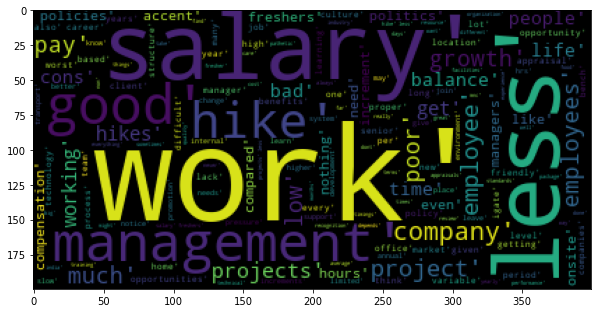

In [44]:
# Word Cloud
non_stopWords = stopwordcount(consdf['stop_removed'])
#print(str(non_stopWords))
plot_word_cloud(str(non_stopWords))

In [45]:
Counter(non_stopWords)

Counter({'iit': 1,
         'paywise': 1,
         'less': 264,
         'great': 16,
         'compensation': 48,
         'opportunities': 43,
         'rpa': 1,
         'good': 163,
         'year': 26,
         'pay': 93,
         'leaving': 3,
         'hike': 162,
         'miss': 1,
         'days': 16,
         'variable': 30,
         'annual': 25,
         'find': 21,
         'say': 14,
         'cons': 71,
         'accent': 46,
         'would': 12,
         'hikes': 87,
         'salary': 236,
         'growth': 94,
         'centric': 5,
         'employer': 6,
         'company': 125,
         'employee': 106,
         'location': 35,
         'projects': 111,
         'limited': 24,
         'chennai': 5,
         'synchrony': 1,
         'illiterate': 1,
         'answer': 1,
         'always': 16,
         'employees': 88,
         'think': 26,
         'weekends': 7,
         'sychrony': 1,
         'come': 13,
         'interview': 6,
         'full': 7,
         

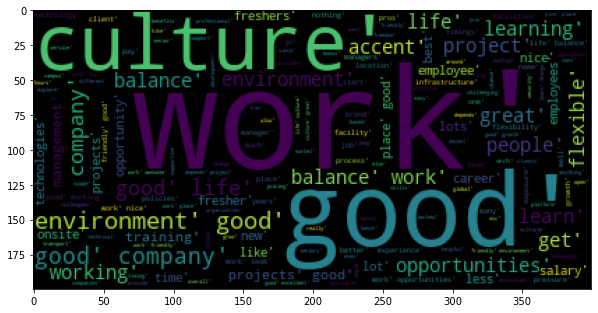

In [46]:
# Word Cloud
non_stopWords1 = stopwordcount(prosdf['stop_removed'])
#print(str(non_stopWords))
plot_word_cloud(str(non_stopWords1))

In [47]:
prosdf.iloc[0,5]

'good company working environment good friendly work pressure less compare companies work culture good great opportunity learn new technology'

In [48]:
analysis = TextBlob(clean_review("good company working environment good friendly work pressure less compare companies work culture good great opportunity learn new technology"))

In [49]:
analysis

TextBlob("good company working environment good friendly work pressure less compare companies work culture good great opportunity learn new technology")

In [50]:
analysis.sentiment

Sentiment(polarity=0.4635281385281385, subjectivity=0.5101731601731603)

In [51]:
abc=TextBlob("Koti is a good boy")

In [52]:
abc.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [53]:
abc=TextBlob("Koti is not a good boy")

In [54]:
abc.sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [55]:
abc=TextBlob("India is a country")

In [56]:
abc.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [57]:

abc=OriginalData.loc[3][0]

In [58]:
abc

'Company is good  to work .\n\nWork life balance .'

In [59]:
abc1=TextBlob(abc)

In [60]:
abc1

TextBlob("Company is good  to work .

Work life balance .")

In [61]:
abc1.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [62]:
abc1.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [63]:
def analize_sentiment(review):
    analysis = TextBlob(clean_review(review))
    
    if analysis.sentiment.polarity > 0:
        return 1
    
    elif analysis.sentiment.polarity < 0:
        return -1
    
    else:
        return 0
    
def analize_sentiment1(review):
    analysis = TextBlob(clean_review(review))
    return analysis.sentiment.subjectivity

def getlabel(text):
    
    score = abs(text['ProsPolarity']) - abs(text['ConsPolarity'])
    
    if score > 0:
        label = 1
        
    elif score <0 :
        label = -1
        
    else:
        label =0
    
    return label

In [64]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]","[work, friendly, environment, good, company, w...",good company working environment good friendly...
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[bangalore, environment, good, working]",good working environment bangalore
2,it has good work environment,"[it, has]",has good work environment,[has],"[work, environment, good]",good work environment
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[],"[work, good, company, life, balance]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[free, environment, colleagues, equality, stre...",equality among colleagues stress free environment


In [65]:
prosdf['Polarity'] = prosdf['CleanedReview'].apply(lambda x: analize_sentiment(x))
consdf['Polarity'] = consdf['CleanedReview'].apply(lambda x: analize_sentiment(x))

In [66]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text,Polarity
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]","[work, friendly, environment, good, company, w...",good company working environment good friendly...,1
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[bangalore, environment, good, working]",good working environment bangalore,1
2,it has good work environment,"[it, has]",has good work environment,[has],"[work, environment, good]",good work environment,1
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[],"[work, good, company, life, balance]",company good work work life balance,1
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[free, environment, colleagues, equality, stre...",equality among colleagues stress free environment,1


In [67]:
prosdf["Polarity"].value_counts()

 1    1138
 0     173
-1      53
Name: Polarity, dtype: int64

In [68]:
import seaborn as sns

C:\Users\harid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), [Text(0, 0, '-1'), Text(1, 0, '0'), Text(2, 0, '1')])

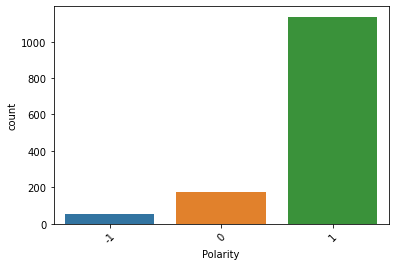

In [69]:
import seaborn as sns
sns.countplot(prosdf["Polarity"])
plt.xticks(rotation=45)

C:\Users\harid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), [Text(0, 0, '-1'), Text(1, 0, '0'), Text(2, 0, '1')])

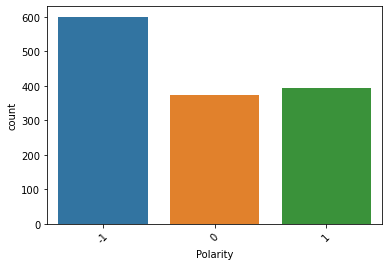

In [70]:
import seaborn as sns
sns.countplot(consdf["Polarity"])
plt.xticks(rotation=45)

In [71]:
prosdf['Subjectivity'] = prosdf['CleanedReview'].apply(lambda x: analize_sentiment1(x))
consdf['Subjectivity'] = consdf['CleanedReview'].apply(lambda x: analize_sentiment1(x))

In [72]:
prosdf.head()

,Pros,PreCleanStopWords,CleanedReview,PostCleanStopWords,stop_removed,clean_text,Polarity,Subjectivity
0,"A very good company, working environment is ve...","[is, as, other, a, to, very, and]",very good company working environment very goo...,"[very, other, and]","[work, friendly, environment, good, company, w...",good company working environment good friendly...,1,0.557027
1,Good working environment in Bangalore,[in],good working environment bangalore,[],"[bangalore, environment, good, working]",good working environment bangalore,1,0.600000
2,it has good work environment,"[it, has]",has good work environment,[has],"[work, environment, good]",good work environment,1,0.600000
3,Company is good to work .\n\nWork life balance .,"[is, to]",company good work work life balance,[],"[work, good, company, life, balance]",company good work work life balance,1,0.600000
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[free, environment, colleagues, equality, stre...",equality among colleagues stress free environment,1,0.800000


In [73]:
prosconsdf = pd.DataFrame(prosdf['CleanedReview'] + ' ' + consdf['CleanedReview'])

In [74]:
prosconsdf.head()

,CleanedReview
0,very good company working environment very goo...
1,good working environment bangalore compensatio...
2,has good work environment they not have good o...
3,company good work work life balance very less ...
4,equality among the colleagues stress free envi...


In [75]:
prosconsdf['words'] = prosconsdf['CleanedReview'].apply(lambda x : len([x for x in x.split()]))

In [76]:
prosconsdf.head()

,CleanedReview,words
0,very good company working environment very goo...,28
1,good working environment bangalore compensatio...,8
2,has good work environment they not have good o...,12
3,company good work work life balance very less ...,24
4,equality among the colleagues stress free envi...,14


In [77]:
prosconsdf["CleanedReview"][0]

'very good company working environment very good and very friendly work pressure less compare other companies work culture good great opportunity learn new technology paywise iit very less'

In [78]:
wor=prosconsdf["CleanedReview"][0].split()
len(wor)

28

In [79]:
prosconsdf['ProsPolarity'] = prosdf.Polarity
prosconsdf['ConsPolarity'] = consdf.Polarity
prosconsdf['ProsSubjectivity'] = prosdf.Subjectivity
prosconsdf['ConsSubjectivity'] = consdf.Subjectivity

In [80]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000


In [81]:
prosconsdf['label'] = prosconsdf.apply(lambda x: getlabel(x), axis = 1)

In [82]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1


In [83]:
prosconsdf["label"].value_counts()

 0    919
 1    322
-1    123
Name: label, dtype: int64

C:\Users\harid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), [Text(0, 0, '-1'), Text(1, 0, '0'), Text(2, 0, '1')])

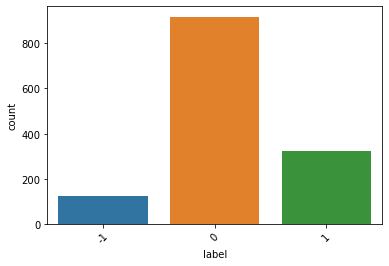

In [84]:
sns.countplot(prosconsdf["label"])
plt.xticks(rotation=45)

In [85]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1


In [86]:
prosconsdf["label1"]=prosconsdf["CleanedReview"].apply(lambda x: analize_sentiment(x))
    

In [87]:
prosconsdf.head()

,CleanedReview,words,ProsPolarity,ConsPolarity,ProsSubjectivity,ConsSubjectivity,label,label1
0,very good company working environment very goo...,28,1,-1,0.557027,0.086667,0,1
1,good working environment bangalore compensatio...,8,1,1,0.600000,0.750000,0,1
2,has good work environment they not have good o...,12,1,1,0.600000,0.550000,0,1
3,company good work work life balance very less ...,24,1,-1,0.600000,0.086667,0,1
4,equality among the colleagues stress free envi...,14,1,0,0.800000,0.000000,1,1


C:\Users\harid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label1', ylabel='count'>

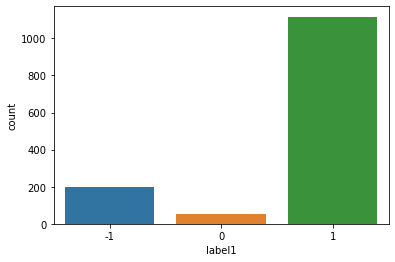

In [88]:
sns.countplot(prosconsdf["label1"])

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=True, tokenizer=None)

sklearn_representation = sklearn_tfidf.fit_transform(prosconsdf.CleanedReview)
print(sklearn_representation)

  (0, 1574)	0.3468829204423605
  (0, 2344)	0.3468829204423605
  (0, 3211)	0.19247670461804775
  (0, 2139)	0.17351894891006042
  (0, 1818)	0.15854912821066902
  (0, 2239)	0.1804458655244008
  (0, 1416)	0.15854912821066902
  (0, 770)	0.1306459014894576
  (0, 615)	0.19851615459545524
  (0, 2269)	0.16475932093294807
  (0, 619)	0.2482414342056751
  (0, 1836)	0.23854811004091414
  (0, 2471)	0.19088714270622226
  (0, 3560)	0.13961444279869614
  (0, 1328)	0.15854912821066902
  (0, 139)	0.08602194959247894
  (0, 1082)	0.12564178090870048
  (0, 3567)	0.14024910599474766
  (0, 617)	0.11426925458089437
  (0, 1398)	0.19851001591321907
  (0, 3468)	0.4804303237685066
  (1, 3234)	0.35169526518753974
  (1, 2167)	0.21322936116102606
  (1, 625)	0.3935073144146326
  (1, 287)	0.6305817471994806
  :	:
  (1362, 1628)	0.41325500728714104
  (1362, 3287)	0.13664365591385366
  (1362, 3598)	0.11658702663586058
  (1362, 198)	0.1650252057683815
  (1362, 2085)	0.37371544161876064
  (1362, 3560)	0.05375976945305782
 

In [90]:
prosconsdf["CleanedReview"][0]

'very good company working environment very good and very friendly work pressure less compare other companies work culture good great opportunity learn new technology paywise iit very less'

In [91]:
prosconsdf.shape

(1364, 8)

In [92]:
len(set(prosconsdf["CleanedReview"][0].split()))

21

In [93]:
len(set(prosconsdf["CleanedReview"][1364].split()))

19

In [94]:
data_features = sklearn_representation.toarray()


In [95]:
type(data_features)

numpy.ndarray

In [96]:
data_features = pd.DataFrame(data_features)
data_features.shape

(1364, 3604)

In [97]:
data_features.head()

,0,1,2,3,4,5,6,7,8,9,...,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.234106,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
Counter(prosconsdf.label1)

Counter({1: 1117, -1: 196, 0: 51})

In [99]:
data_features['Sentiment'] = prosconsdf.label1

In [100]:
data_features["Sentiment"].value_counts()

 1.0    1116
-1.0     196
 0.0      51
Name: Sentiment, dtype: int64

In [101]:
data_features=data_features.dropna()

In [102]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_features,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(1090, 3605) (273, 3605)


In [103]:
x_train=train.drop(["Sentiment"],axis=1)
y_train=train["Sentiment"]
x_test=test.drop(["Sentiment"],axis=1)
y_test=test["Sentiment"]

In [104]:
train["Sentiment"].value_counts()

 1.0    897
-1.0    155
 0.0     38
Name: Sentiment, dtype: int64

In [105]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train,y_train)

MultinomialNB()

In [106]:
mn.score(x_train,y_train)

0.8229357798165138

In [107]:
mn.score(x_test,y_test)

0.7985347985347986

In [108]:
from sklearn.svm import SVC
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [109]:
sv.score(x_train,y_train)

0.8458715596330275

In [110]:
sv.score(x_test,y_test)

0.8021978021978022